Linear Regression

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
Offense2 = pd.read_csv('QB2.csv')
Offense2 = Offense2.dropna(axis='rows')
Offense2.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Player_Code,Game Played,Pass Att,Pass Comp,Pass Yard,Pass Int,Pass TD,Rush Att,Rush Yard,Rush TD
0,59,2014,A.J. McCarron,QB,3,Alabama,College Stats,75,220,4.94,...,1022888,49,20.938776,14.000000,184.061225,0.306122,1.571429,2.428571,-1.020408,0.061224
1,148,2012,Aaron Corp,QB,0,Richmond,0,75,215,4.61,...,1035872,2,31.500000,16.000000,188.000000,1.000000,0.500000,2.000000,20.000000,0.000000
2,50,2014,Aaron Murray,QB,0,Georgia,College Stats,73,207,4.84,...,1024001,52,28.423077,17.711538,253.192308,0.788462,2.326923,5.500000,7.615385,0.307692
3,137,2008,Adam Tafralis,QB,0,San Jose State,College Stats,73,221,4.78,...,59620,36,26.722222,15.944444,197.666667,0.777778,1.388889,5.888889,14.194444,0.194444
4,119,2008,Alex Brink,QB,0,Washington State,College Stats,74,211,4.96,...,64890,35,35.914286,21.457143,274.514286,1.085714,1.971429,5.628571,4.228571,0.114286


In [78]:
X = Offense2[["Height", "Wt", "40YD", "Vertical", "Broad Jump", "3Cone", "Shuttle", "Pass Att", "Pass Comp", "Pass Yard", "Pass Int", "Pass TD", "Rush Att", "Rush Yard", "Rush TD"]]
y = Offense2["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(195, 15) (195, 1)


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.26466091782725365
Testing Score: 0.21349538049544026


Text(0.5, 1.0, 'Residual Plot')

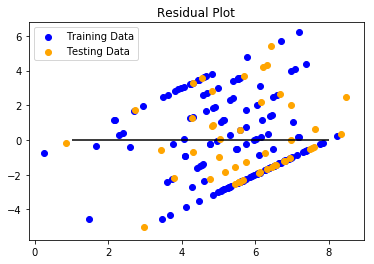

In [82]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [83]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [85]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.172426478891466
R-squared (R2 ): 0.26939600875229197


In [87]:
model.score(X, y)

0.26939600875229197

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
model.score(X_test, y_test)

0.21349538049544026

Logical Regression


In [91]:
XOffense = Offense2.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted", "Round", "Draft_Outcome", "Game Played","Player_Code"])

In [92]:
X = XOffense
y = Offense2["Round"]
print(X.shape, y.shape)

(195, 16) (195,)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [94]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5068493150684932
Testing Data Score: 0.32653061224489793


In [97]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [8 2 2 8 6 1 8 8 8 8]
First 10 Actual labels: [2, 8, 1, 8, 5, 8, 2, 1, 8, 4]


In [75]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,8,2
1,2,8
2,2,1
3,8,8
4,6,5
5,1,8
6,8,2
7,8,1
8,8,8
9,8,4
